# Pymaceuticals Inc.
---

### Analysis

Some observations we can make from the data are the following:
- The correlation coefficient was 0.84 which indicates a strong positive relationship between average tumor volume and weight(g) of the mice. Positive correlation means that as one variable increases, the other variable also tends to increase. So in this case, we can say that if the weight of the mouse increases, the average tumor volume will increase as well.
-Capomulin is the second most effective drug treatment, after Ramicane. We can come to this conclusion by looking at the mean tumor volume.
- After studying the single mouse data, we can observe that over time the Capomulin treatment helped decrease the average tumor volume.
- Ramicane and Capomulin have the two lowest mean tumor volume as well as the most number of data points. It would be interesting to observe how the tumor volume for the other drug regimens would change if they had more data points.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on=['Mouse ID'], how='left')

# Display the data table for preview
display(combined_data.head(5))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
# Checking the number of mice. Should be 249
total_mice = combined_data['Mouse ID'].nunique()
print(total_mice)

249


In [66]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# I got the following from Xpert Learning Assistant:
duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# This will give you the duplicate rows based on MouseID and Timepoint
duplicate_rows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [67]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
#Index numbers don't quite match the starter code
display(duplicate_mouse_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


## Create a clean DataFrame by dropping the duplicate mouse by its ID.¶

In [68]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.

# How you select data for everything except for mouse g989
#I got the following code from Xpert Learning Assistant:
except_mouse_id_989 = combined_data['Mouse ID'] != 'g989'
combined_data = combined_data[except_mouse_id_989]
display(combined_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
# Checking the number of mice in the clean DataFrame. Should we 248
total_mice = combined_data['Mouse ID'].nunique()
print(total_mice)

248


## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# group by drug regimen
mean_tumor_volume = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume')
median_tumor_volume = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('Median Tumor Volume')
tumor_volume_variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename('Tumor Volume Variance')
tumor_volume_std = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename('Tumor Volume Std. Dev.')
sem_result = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename('Tumor Volume Std. Err.')

tumor_volume_summary = pd.merge(mean_tumor_volume, median_tumor_volume, on='Drug Regimen')
tumor_volume_summary = pd.merge(tumor_volume_summary, tumor_volume_variance, on='Drug Regimen')
tumor_volume_summary = pd.merge(tumor_volume_summary, tumor_volume_std, on='Drug Regimen')
tumor_volume_summary = pd.merge(tumor_volume_summary, sem_result, on='Drug Regimen')


display(tumor_volume_summary)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#I got the .agg code on Xpert Learning Assistant
summary_stats = combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

display(summary_stats)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

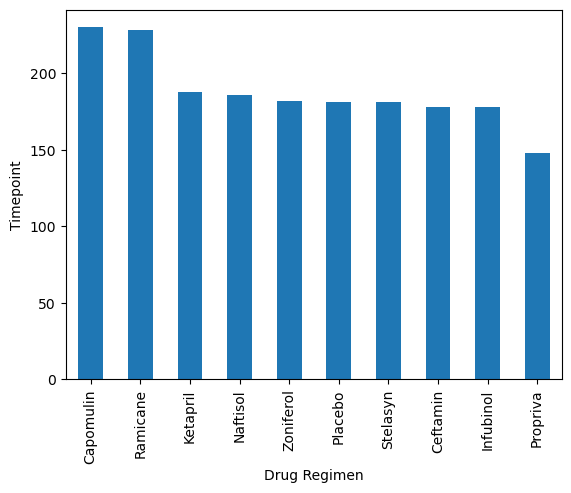

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#I got help for the following from a Tutor
#The order of the drugs are not exactly the same as starter code but not sure if that matters as long as the data looks right.
timepoint_df=combined_data.groupby('Drug Regimen').Timepoint.count().sort_values(ascending=False)
timepoint_df.plot.bar(ylabel='Timepoint');

In [75]:
timepoint_df.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

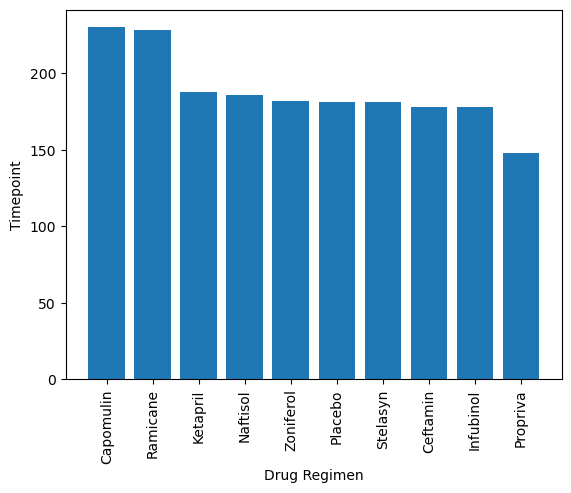

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_df.index,timepoint_df)
plt.xticks(rotation=90)
plt.ylabel('Timepoint')
plt.xlabel('Drug Regimen')
plt.show()

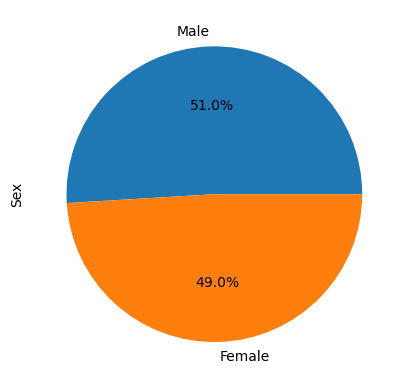

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#I got help from a tutor for the following:
gender_df=combined_data.Sex.value_counts()
gender_df.plot.pie(ylabel='Sex',autopct='%.1f%%');

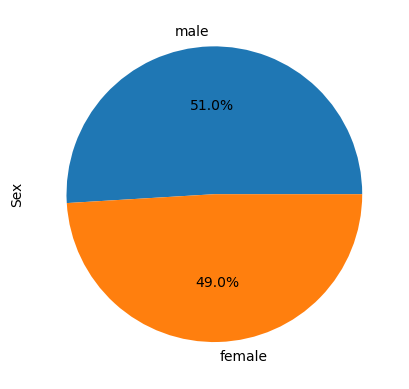

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df,autopct='%.1f%%',labels=['male','female'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Locate the rows which contain mice on each drug and get the tumor volumes

#I got help from a tutor for the following:
# Create empty list to fill with tumor vol data (for plotting)
#Tumor_list is the empty list
tumor_volume_data = []
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = combined_data.groupby('Mouse ID').Timepoint.max().reset_index().merge(combined_data,on=['Mouse ID','Timepoint'])

# Put treatments into a list for for loop (and later for plot labels)
for drug in drugs:
    tumor = tumor_df[tumor_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # add subset 
    tumor_volume_data.append(tumor)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.  
    iqr = tumor.quantile(.75)-tumor.quantile(.25)

    # Determine outliers using upper and lower bounds
    lower_bound = tumor.quantile(.25) - 1.5*iqr
    upper_bound = tumor.quantile(.75) + 1.5*iqr

    print(f"{drug}'s potential outliers: {tumor[(tumor<lower_bound)|(tumor>upper_bound)]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


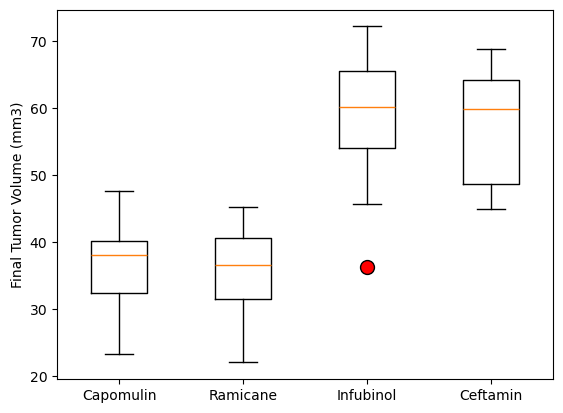

In [80]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=drugs, flierprops={'markersize': 10, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


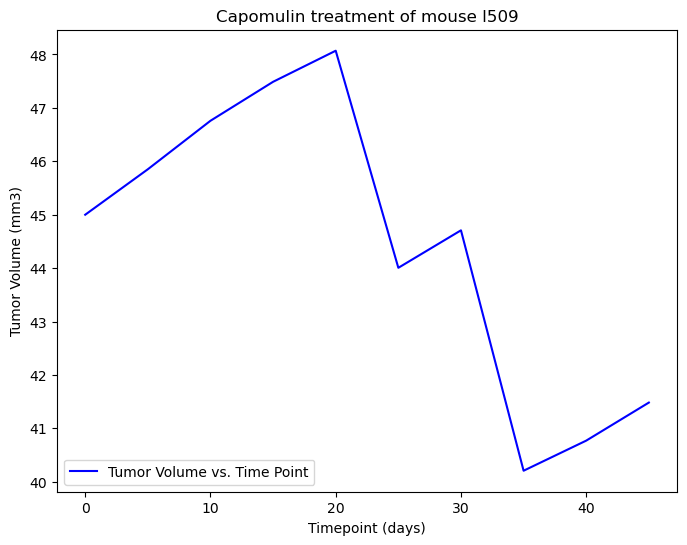

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for a single mouse treated with Capomulin
#I got the following code from Xpert Learning Assistant 
single_mouse_data = combined_data[(combined_data['Mouse ID'] == 'l509') & (combined_data['Drug Regimen'] == 'Capomulin')]
display(single_mouse_data)

#Extract the time points and tumor volumes
time_points = single_mouse_data['Timepoint']
tumor_volumes = single_mouse_data['Tumor Volume (mm3)']

# # Create a line plot using Matplotlib

plt.figure(figsize=(8,6))
plt.plot(time_points, tumor_volumes, color='b', label='Tumor Volume vs. Time Point')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.legend(loc='lower left')
plt.show()

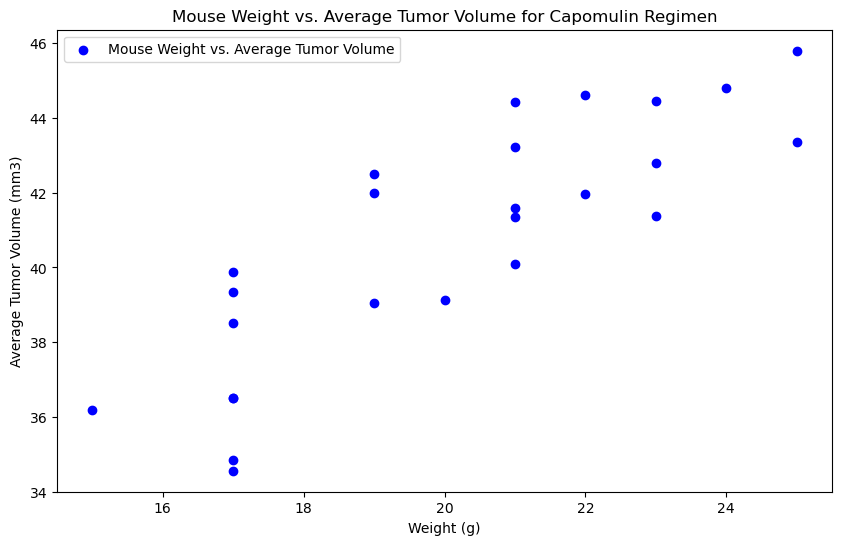

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
#display(avg_tumor_volume)

# Merge the average tumor volume data with the mouse weight data
#I got the following code from Xpert Learning Assistant
merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='inner').drop_duplicates()
#display(merged_data)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', label='Mouse Weight vs. Average Tumor Volume')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()

# Show the plot
plt.show()

## Correlation and Regression

In [94]:
# 1. Calculate the correlation coefficient for mouse weight 
# and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
#I got the following code on ChatGPT
correlation_coefficient, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

print(f'Correlation Coefficient: {round(correlation_coefficient, 2)}')

Correlation Coefficient: 0.84


Linear Regression: y = 0.9544396890241047 * x + 21.55216053268501


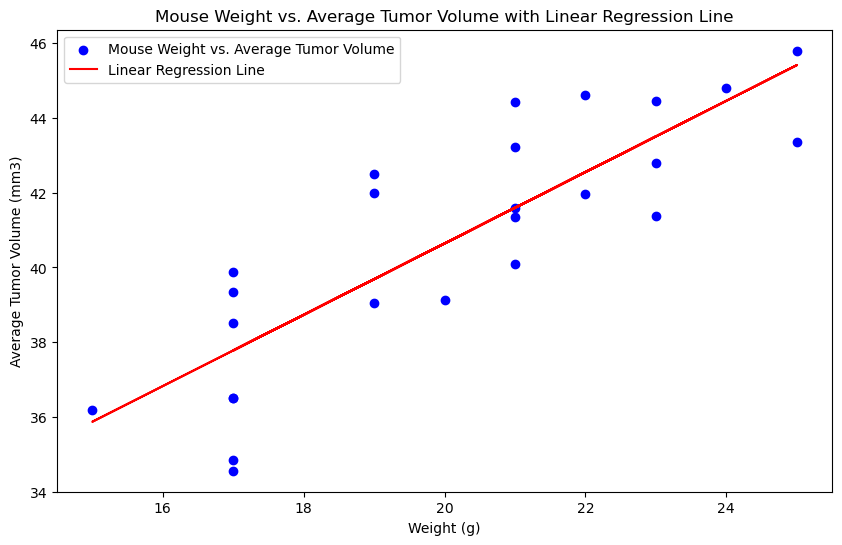

In [93]:
# 2.Create a linear regression model
#I got the following on chatGPT
X = merged_data[['Weight (g)']]
y = merged_data['Tumor Volume (mm3)']

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the linear regression model
slope = model.coef_[0]
intercept = model.intercept_
print(f'Linear Regression: y = {slope} * x + {intercept}')

# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', label='Mouse Weight vs. Average Tumor Volume')
plt.plot(X, model.predict(X), color='r', label='Linear Regression Line')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume with Linear Regression Line')
plt.legend()

# Show the plot
plt.show()